# 6.6 Sourcing & Analyzing Time-Series Data

# This script contains the following:
1. Importing your libraries and data
2. Subsetting, wrangling, and cleaning time-series data
3. Time series analysis: decomposition
4. Testing for stationarity
5. Stationarizing the Federal Reserve Economic Data

### 1. Importing  libraries and data

In [98]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

# Framework
Ideally, global economic data would have been used, however due to the limitations of the Quandl account (free), GDP data will bee used instead. This reflects to some extent that economic conditions, and, play an important role in migration. Countries with a higher GDP may attract more migrants due to better job opportunities (pull factor), while countries with a lower GDP may see more emigration due to poverty or lack of opportunities (push factor).
Impact on migration outcomes: Economic conditions in both origin and destination countries can affect the risks associated with migration. For example, poorer countries may have a higher number of dangerous migration attempts, resulting in more deaths or missing persons.

In [100]:
# Configure API key 

quandl.ApiConfig.api_key = 'YZ8kHoBaioEta7Eo3zry'

In [114]:
# Importing the Federal Reserve Economic Data "Gross Domestic Product" variable.

data = quandl.get('FRED/GDP')


In [116]:
data.head(5)

,Value
Date,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742


In [118]:
data.shape

(300, 1)

In [120]:
data.columns

Index(['Value'], dtype='object')

In [122]:
type(data)

pandas.core.frame.DataFrame

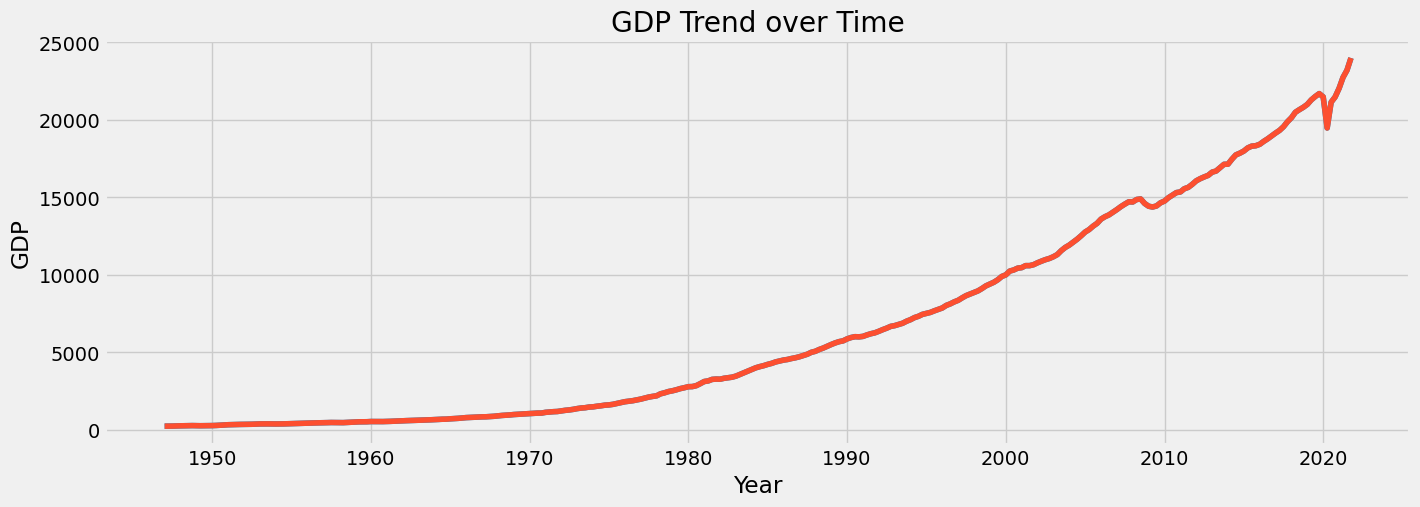

In [163]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!
plt.plot(data.index, data['Value'])
plt.title('GDP Trend over Time')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.plot(data)

In [177]:
# Reset index so that you can use the "Date" column as a filter

data_2 = data.reset_index()

In [130]:
data_2.head()

,Date,Value
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742


In [189]:
data_sub = data_2.loc[(data_2['Date'] >= '2014-01-01') & (data_2['Date'] < '2024-06-01')]

In [191]:
data_sub.shape

(32, 2)

In [193]:
data_sub.head()

,Date,Value
268,2014-01-01,17144.281
269,2014-04-01,17462.703
270,2014-07-01,17743.227
271,2014-10-01,17852.540
272,2015-01-01,17991.348


In [195]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,Value
datetime,
2014-01-01,17144.281
2014-04-01,17462.703
2014-07-01,17743.227
2014-10-01,17852.540
2015-01-01,17991.348


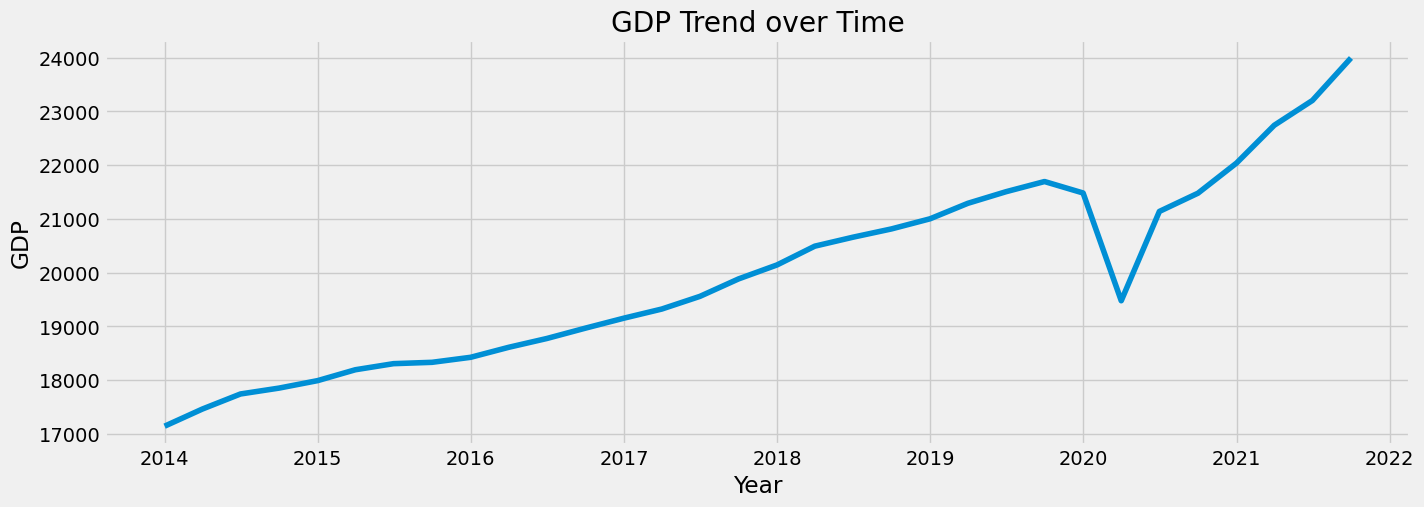

In [197]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.title('GDP Trend over Time')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.plot(data_sub)

# Interpretation

There is a consistent upward trend in GDP from 2014 to 2022, indicating economic growth over these years.
Around 2020, there is a noticeable dip, likely correlating with events such as the global COVID-19 pandemic, which caused significant economic disruptions worldwide.

Following the dip, there is a sharp recovery, showing economic resilience and recovery efforts

After the initial drop, GDP resumes its upward trend, possibly indicating effective policy responses and adaptations by businesses..

In [201]:
# Check for missing values (you shouldn't have any)

data_sub.isnull().sum()

Value    0
dtype: int64

In [203]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

# No dups!

0

In [205]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [207]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

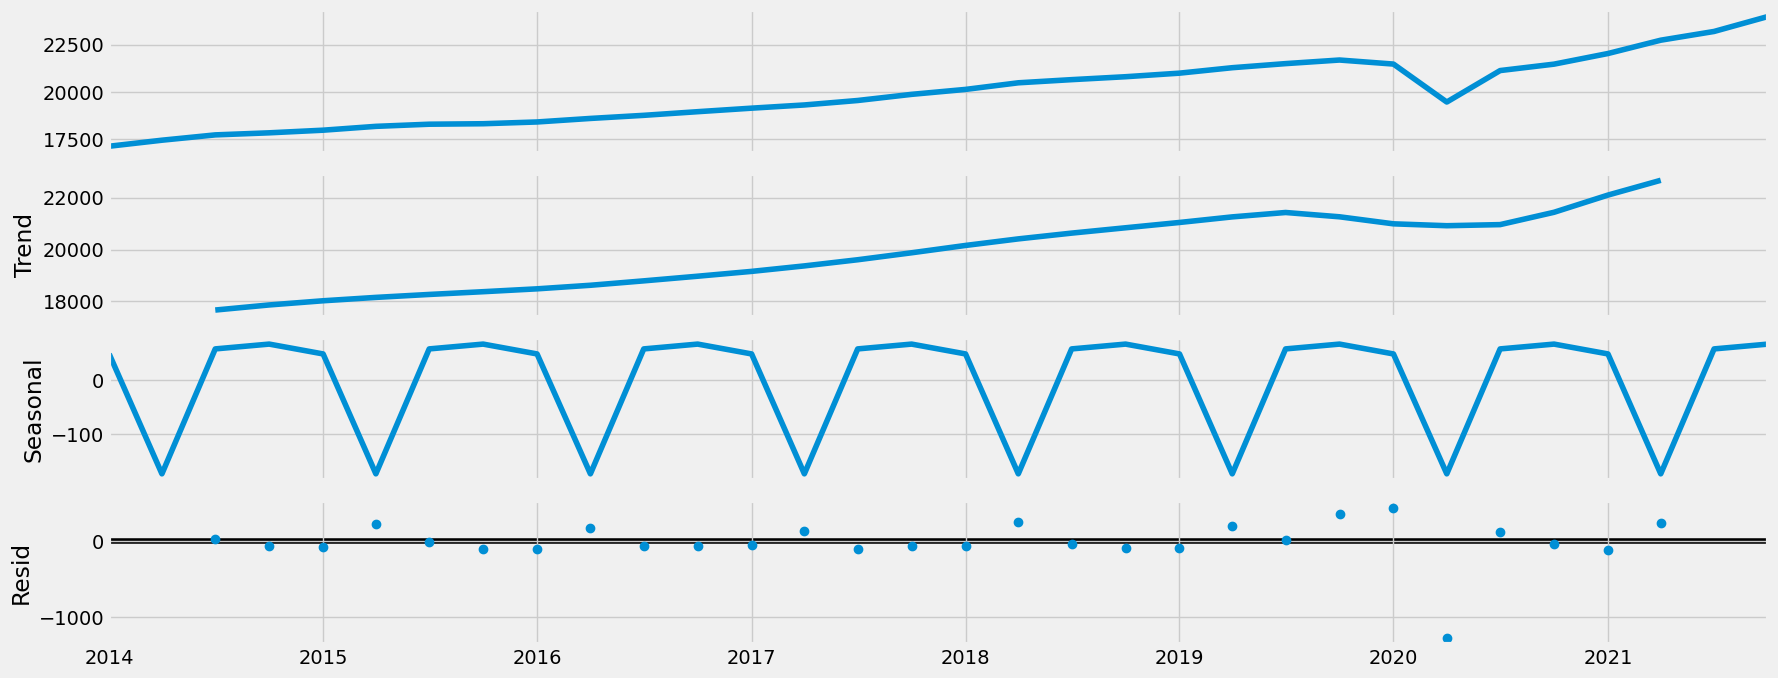

In [209]:
# Plot the separate components

decomposition.plot()
plt.show()

# Observation and Interpreptation 

1. Trend Component:
Observation: The trend line shows a consistent increase over time, reflecting the long-term growth in GDP.
Interpretation: This upward trajectory indicates overall economic growth across the given perio
d2
2. Seasonal Component:
Observation: There are regular fluctuations over each year, showing consistent seasonal patterns.
Interpretation: These patterns suggest recurring economic activities, possibly linked to fiscal quarters, holiday seasons, or other cyclical fact
3rs.
3. Residual Component:
Observation: The residuals are the random noise not explained by the trend or seasonal components.
Interpretation: In this chart, the residuals are relatively small, indicating that most variations in GDP are well captured by the trend and seasonal components.

### 4. Testing for stationarity

In [155]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                  -1.907504
p-value                          0.328539
Number of Lags Used              2.000000
Number of Observations Used    159.000000
Critical Value (1%)             -3.472161
Critical Value (5%)             -2.879895
Critical Value (10%)            -2.576557
dtype: float64


# Analysis of  Results:

Non-Stationary: The Test Statistic (-1.907504) is greater than all the critical values. Additionally,  p-value (0.328539) is greater than 0.05.  This indicates that it fail to reject the null hypothesis of non-stationarity. 

Next Steps: Since  data is non-stationary, we'll need to make it stationary before proceeding with further analysis. 

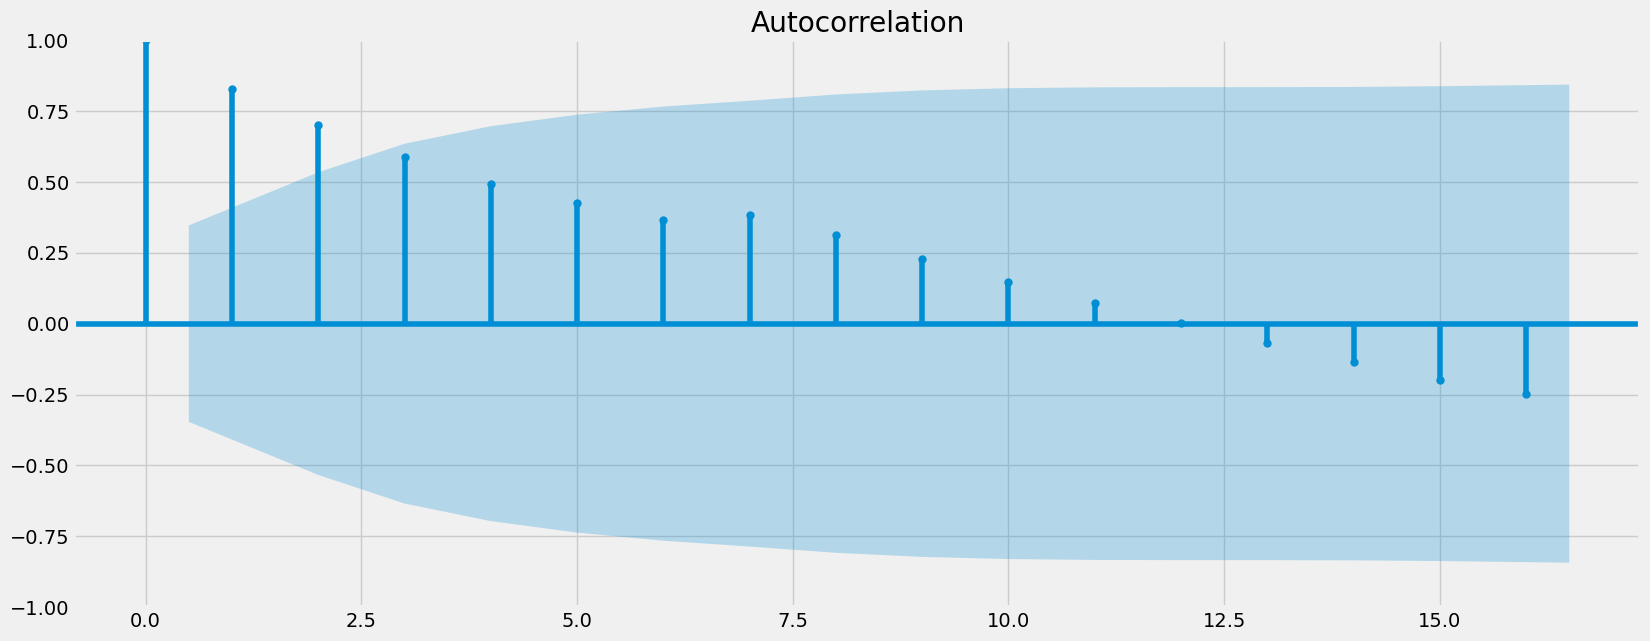

In [218]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

# Strong Autocorrelation: 

The plot shows several significant spikes that extend beyond the confidence bands, indicating strong autocorrelation in the GDP data. This means that there are strong relationships between the values at different points in time.

Pattern of Autocorrelation:
    
High autocorrelation for the first few lags (especially at lag 1). This suggests strong dependence on the previous periods    .
Autocorrelation gradually decreases as the lag increases. This is typical of time series dat    a.
Non-Stationarity: The strong autocorrelation suggests tyour GDP data is likely non-stationry. This confirms wwe you found with the Dickey-Fuller test.

#  Stationarizing the Federal Reserve Economic Data

In [223]:
data_diff = data_sub - data_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [225]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [227]:
data_diff.head()

,Value
datetime,
2014-04-01,318.422
2014-07-01,280.524
2014-10-01,109.313
2015-01-01,138.808
2015-04-01,202.359


In [229]:
data_diff.columns

Index(['Value'], dtype='object')

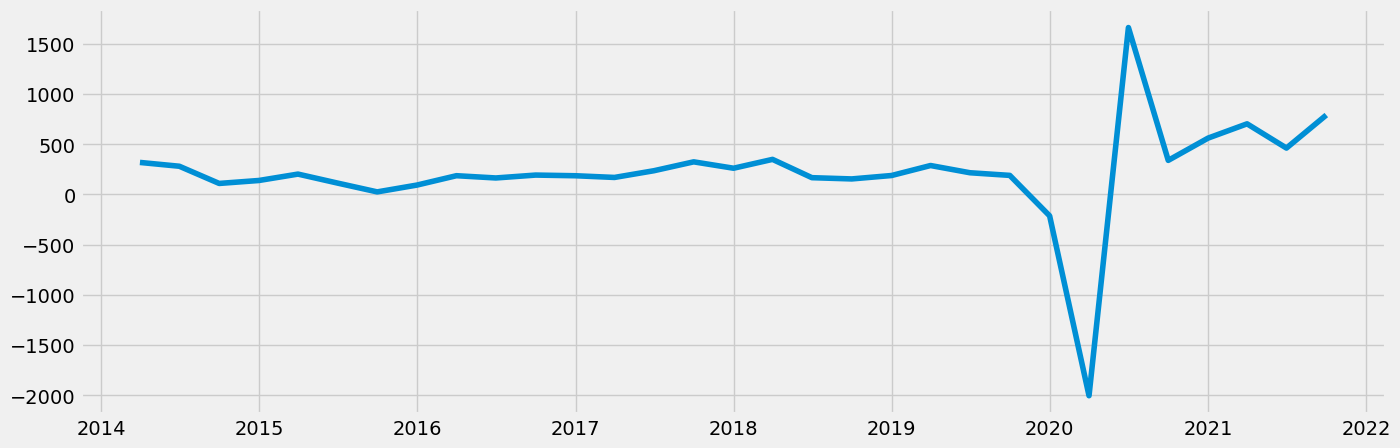

In [231]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

# Interpretattion

Fluctuations: The differenced plot shows fluctuations around a central line (approximately zero). The sharp spikes and dips have been significantly reduced compared to the original GDP plot.

No Clear Trend: The plot doesn't display a clear upward or downward trend anymore. This is a good indication that the differencing might have helped reduce the non-stationarity


Potential Seasonality: While the trend is less apparent, there might still be some lingering seasonalitys.

In [233]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -3.805138
p-value                         0.002855
Number of Lags Used             9.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


# Test Statistic (-3.805138): 
The Test Statistic is significantly less than all the critical values (1%, 5%, and 10%). This indicates strong evidence against the null hypothesis of non-stationarity.
p-value (0.002855): The p-value is less than 0.05, which further reinforces the rejection of the null hypothesis.
Critical Values: The critical values (1%, 5%, and 10%) are the thresholds for different significance levels.
Conclusion# :

Stationary Data: Based on the Test Statistic and the p-value, you can confidently conclude that your differenced GDP data (data_diff) is now statio Steps:

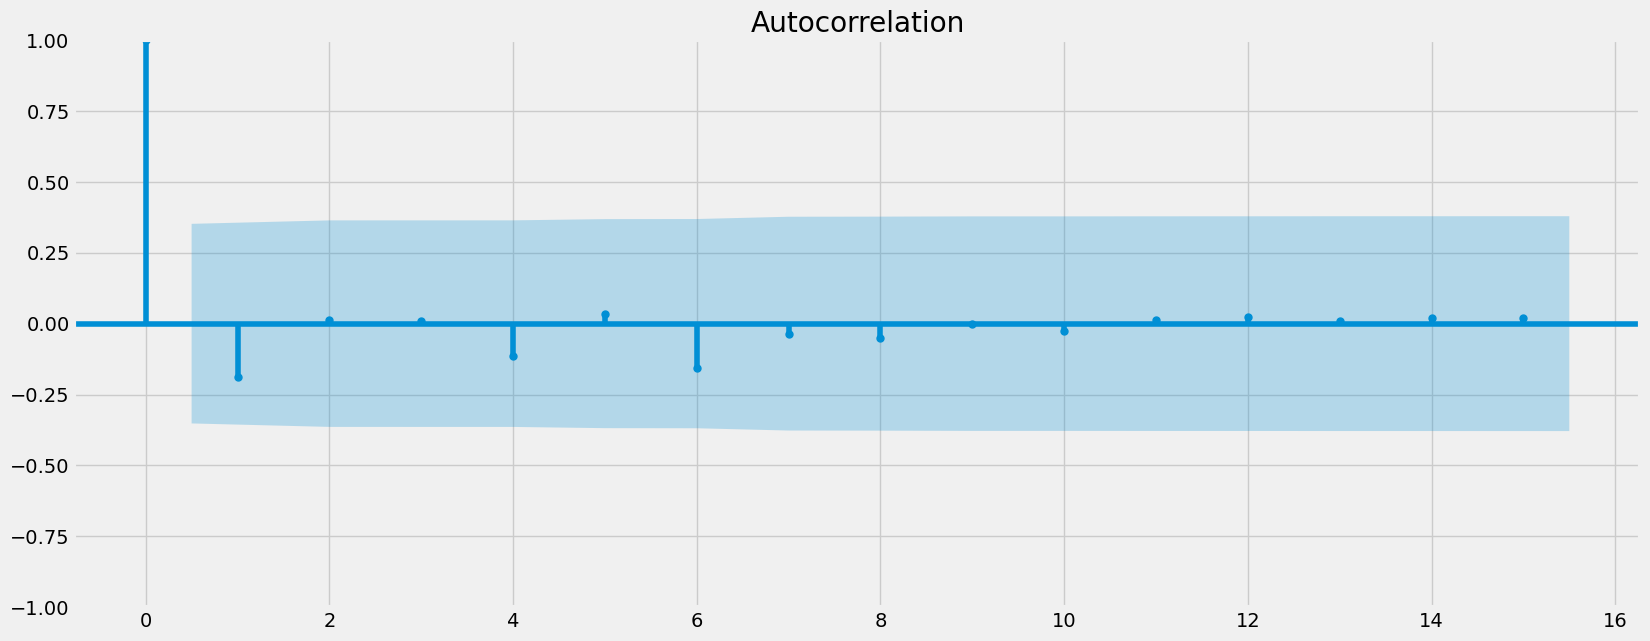

In [235]:
plot_acf(data_diff)
plt.show()

#  Randomness: 
Most of the autocorrelation coefficients are within the confidence bands, indicating that there is little to no significant autocorrelation at any lag. This suggests that the differencing has successfully removed the serial dependence in your GDP data.

# Confirmation of Stationarity: This random pattern of autocorrelation, along with the Dickey-Fuller test results, confirms that our data is now stationary.